In [1]:
import pandas as pd

# Loading dataset
vac = pd.read_csv(r"C:\Users\Manoj\Desktop\FynnL\Team\vacation.csv")

# Columns
vac.columns

# Dimension of dataframe
vac.shape

# Summary of dataframe
vac.describe()

# to show levels of income column
levels = vac['Income2']
levels

0       30-60k
1        >120k
2      90-120k
3       30-60k
4         <30k
        ...   
995     30-60k
996     60-90k
997     60-90k
998        NaN
999      >120k
Name: Income2, Length: 1000, dtype: object

,luxury / be spoilt,do sports,"excitement, a challenge",not exceed planned budget,realise creativity,fun and entertainment,good company,health and beauty,free-and-easy-going,entertainment facilities,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1
996,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,1,0
997,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
998,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


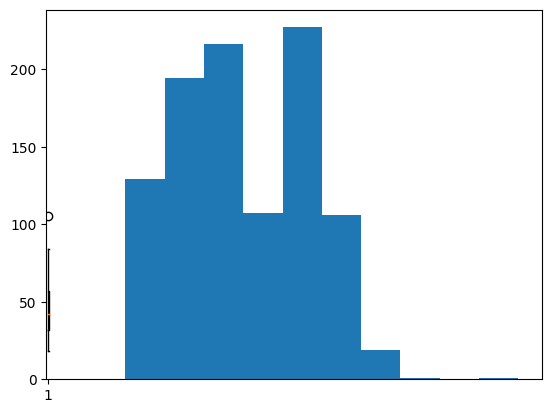

In [4]:
import matplotlib.pyplot as plt

# To represent age column in histogram
plt.hist('Age', data = vac)

# Boxplot representation for age column of dataset
plt.boxplot(vac['Age'])

# Converting dichotomous ordinal or nominal variables to binary
vacmot = (vac.iloc[:, 13:33] == "yes").astype(int)
vacmot

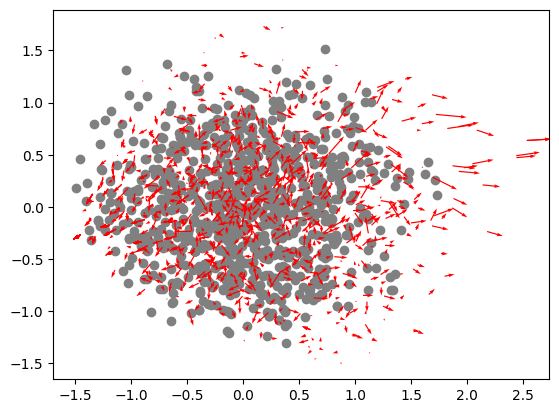

In [5]:
# Principle componant analysis
from sklearn.decomposition import PCA
pca = PCA()
vacmot_pca = pca.fit_transform(vacmot)

# Accessing the principal components
principal_components = pca.components_

principal_components

import numpy as np
plt.scatter(vacmot_pca[:, 1], vacmot_pca[:, 2], marker='o', color='grey')
proj_axes = np.dot(vacmot_pca, pca.components_[1:3].T)
plt.quiver(vacmot_pca[:, 0], vacmot_pca[:, 1], proj_axes[:, 0], proj_axes[:, 1], color='red')
plt.show()



In [6]:
# Distance base methods

# Euclidian distance for dataset
from scipy.spatial.distance import pdist, squareform
D1 = pdist(vacmot)
D1_square = squareform(D1)
D1_rounded = pd.DataFrame(D1_square).round(2)
print(D1_rounded)

# Manhattan distance for the dataset
D2 = pdist(vacmot, metric = 'cityblock')
D2_square = squareform(D1)
D2_rounded = pd.DataFrame(D1_square).round(2)
print(D2_rounded)                                     # Ecludian and Manhattan distances are too similar for this dataset

      0     1     2     3     4     5     6     7     8     9    ...   990  \
0    0.00  2.24  2.00  2.65  2.00  2.00  2.45  3.32  3.00  2.00  ...  2.00   
1    2.24  0.00  2.65  2.45  2.24  2.65  2.24  2.83  2.45  1.73  ...  2.24   
2    2.00  2.65  0.00  3.32  2.45  2.45  3.16  3.00  3.61  2.83  ...  2.00   
3    2.65  2.45  3.32  0.00  3.00  2.65  2.65  3.16  2.00  2.24  ...  3.00   
4    2.00  2.24  2.45  3.00  0.00  2.00  2.00  3.00  3.00  2.45  ...  2.45   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
995  3.16  2.65  3.16  1.73  2.83  3.16  2.83  2.65  2.65  2.83  ...  2.83   
996  3.00  2.83  3.00  3.16  2.24  3.00  3.00  2.83  3.46  3.00  ...  2.65   
997  2.00  2.24  2.83  2.24  2.00  1.41  2.00  3.32  2.24  1.41  ...  2.83   
998  1.41  2.24  2.45  2.65  2.45  2.45  2.45  3.00  2.65  2.45  ...  2.45   
999  2.45  2.24  2.83  2.65  2.83  2.83  2.83  3.00  3.00  2.45  ...  2.45   

      991   992   993   994   995   996   997   998   999  
0  

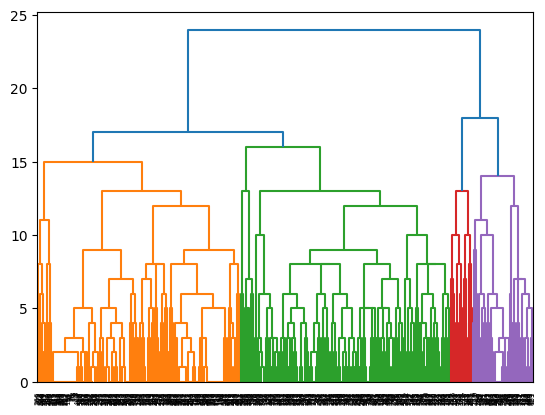

0    469
1     94
dtype: int64
0    222
1    215
2     69
3     25
4     16
5     16
dtype: int64
         Recreational  Health  Career  Financial  Safety  Social
Cluster                                                         
0                 2.0     2.6     1.6        1.8     1.9     2.1
1                 1.9     1.6     1.8        1.7     2.1     1.6
2                 2.9     3.6     2.4        2.8     3.6     2.6
3                 4.2     3.7     4.1        3.2     3.2     3.7
4                 1.8     3.4     2.6        3.7     1.9     1.2
5                 2.2     2.7     4.1        2.9     2.8     2.9


In [7]:
# Hierarchical Methods
risk = pd.read_csv(r"C:\Users\Manoj\Desktop\FynnL\Team\risk.csv")
risk.shape
# mean of each column
np.mean(risk, axis = 0)

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
risk_dist = pdist(risk, metric='cityblock')
risk_hcl = linkage(risk_dist, method='complete')
dendrogram(risk_hcl)
plt.show()

from scipy.cluster.hierarchy import cut_tree
c2 = cut_tree(risk_hcl, height=20)
cluster_counts = pd.Series(c2.flatten()).value_counts().sort_index()
print(cluster_counts)

c6 = cut_tree(risk_hcl, n_clusters=6)
cluster_counts = pd.Series(c6.flatten()).value_counts().sort_index()
print(cluster_counts)

# Accessing characterstics of columns
c6_risk = pd.concat([pd.Series(c6.flatten(), name='Cluster'), risk], axis=1)
c6_means = c6_risk.groupby('Cluster').mean()
c6_means_rounded = c6_means.round(1)
print(c6_means_rounded)


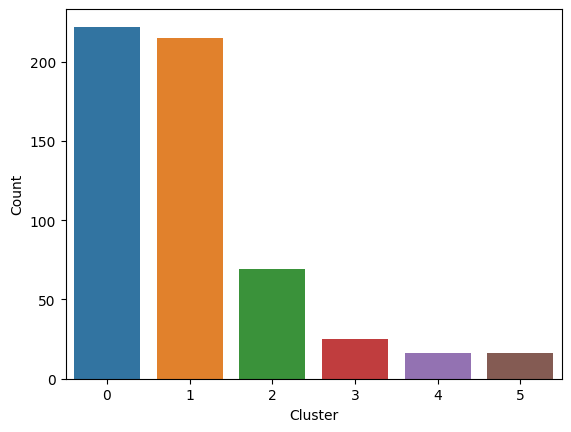

In [8]:
# Bar chart of cluster means from hierarchical clustering
import seaborn as sns
c6_risk = pd.concat([pd.Series(c6.flatten(), name='Cluster'), risk], axis=1)
sns.countplot(data=c6_risk, x='Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [9]:
# Partitioning methods
from sklearn.datasets import make_blobs
np.random.seed(1234)
PF3, _ = make_blobs(n_samples=500, centers=3, random_state=1234)
print(PF3.shape)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
PF3_km3 = kmeans.fit_predict(PF3)
print(PF3_km3)

# features / performance / quality  of k means clstering
cluster_centers = kmeans.cluster_centers_
inertia = kmeans.inertia_
print("Cluster Centers:")
print(cluster_centers)
print("\nInertia:", inertia)


(500, 2)


C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 1 0 0 0 1 0 0 1 2 0 0 2 2 2 2 1 0 1 1 0 0 1 0 0 0 0 0 1 2 0 0 2 2 2 0
 0 2 2 1 0 2 1 2 1 0 0 1 1 2 2 2 1 2 1 0 2 2 0 2 1 2 1 0 2 2 0 2 1 1 1 1 0
 1 1 0 2 0 1 2 1 0 1 1 0 1 1 0 2 2 2 0 1 1 1 1 0 0 2 2 1 2 2 0 2 0 1 2 2 0
 2 1 2 2 1 0 0 0 2 2 2 1 1 1 0 2 0 1 1 1 0 0 0 0 2 2 0 2 0 0 2 1 1 2 2 1 2
 0 1 0 1 1 2 2 1 0 1 2 0 0 0 1 1 2 2 0 0 1 0 0 2 0 1 2 2 1 0 1 2 1 2 0 2 0
 1 1 1 0 1 0 2 0 0 0 0 0 1 0 0 2 0 0 2 1 2 0 0 2 0 2 1 2 0 0 1 2 0 2 0 2 2
 2 0 1 2 1 2 0 1 2 0 1 0 1 0 1 2 0 1 0 0 0 2 1 1 1 0 0 0 0 0 2 1 1 1 0 1 0
 1 2 1 2 1 2 2 2 2 0 1 2 1 2 2 1 2 1 2 1 2 0 0 2 1 1 1 0 1 2 1 2 2 1 2 1 2
 2 0 0 2 0 0 2 1 0 1 2 0 2 0 1 2 1 0 1 2 0 0 2 2 0 2 1 0 2 2 2 2 1 0 1 0 1
 0 1 2 1 2 2 1 1 2 1 1 1 0 0 0 0 1 1 2 1 2 2 1 2 2 0 0 2 2 2 0 1 1 0 0 2 1
 2 1 0 0 1 2 2 2 1 2 0 0 0 1 0 2 0 0 2 1 1 0 1 2 2 1 2 0 0 2 2 1 0 0 1 2 1
 1 0 2 2 1 0 2 2 2 0 2 1 0 2 2 2 1 1 2 1 0 1 0 1 1 0 0 2 2 1 0 0 1 0 0 0 2
 0 2 1 1 1 1 1 0 2 2 2 1 2 1 0 0 0 1 2 1 1 2 1 2 2 0 2 0 2 1 0 1 0 2 1 1 1
 1 1 1 1 0 2 2 1 1 2 2 0 

In [10]:
# K means clustering
from scipy.spatial import ConvexHull
unique_clusters = np.unique(PF3_km3)
cluster_hulls = []
for cluster_label in unique_clusters:
    cluster_points = PF3[PF3_km3 == cluster_label]
    hull = ConvexHull(cluster_points)
    cluster_hulls.append(hull)
for i, hull in enumerate(cluster_hulls):
    print(f"Cluster {i + 1} Convex Hull:")
    print(hull)
    
from sklearn.metrics import silhouette_score
k_values = range(2, 9)  # Range of k values to evaluate
n_rep = 10  # Number of repetitions for each k value
silhouette_scores = []  # List to store silhouette scores
for k in k_values:
    k_scores = []
    for _ in range(n_rep):
        kmeans = KMeans(n_clusters=k, random_state=0)
        cluster_labels = kmeans.fit_predict(PF3)
        score = silhouette_score(PF3, cluster_labels)
        k_scores.append(score)
    mean_score = np.mean(k_scores)
    silhouette_scores.append(mean_score)

best_k = k_values[np.argmax(silhouette_scores)]
print("Silhouette Scores:")
for k, score in zip(k_values, silhouette_scores):
    print(f"k={k}: {score:.3f}")

print("\nBest k:", best_k)


Cluster 1 Convex Hull:
Cluster 2 Convex Hull:
Cluster 3 Convex Hull:


C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Silhouette Scores:
k=2: 0.758
k=3: 0.756
k=4: 0.616
k=5: 0.494
k=6: 0.309
k=7: 0.326
k=8: 0.333

Best k: 2


C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Silhouette Scores:
k=2: 0.277
k=3: 0.221
k=4: 0.204
k=5: 0.168
k=6: 0.164
k=7: 0.156
k=8: 0.166

Best k: 2


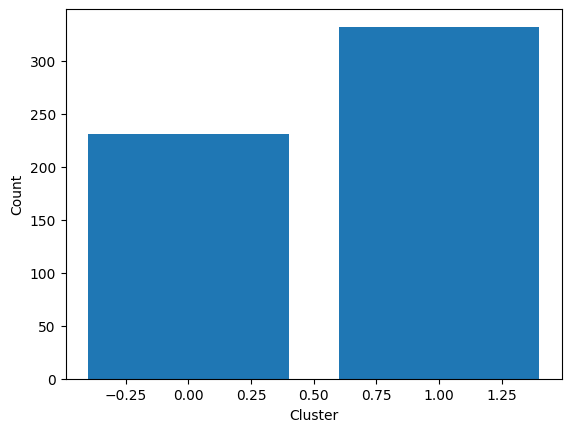

In [11]:
# Bichart
np.random.seed(1234)
k_values = range(2, 9)
n_rep = 10
silhouette_scores = []
for k in k_values:
    k_scores = []
    for _ in range(n_rep):
        kmeans = KMeans(n_clusters=k, random_state=0)
        cluster_labels = kmeans.fit_predict(risk)
        score = silhouette_score(risk, cluster_labels)
        k_scores.append(score)
    mean_score = np.mean(k_scores)
    silhouette_scores.append(mean_score)

best_k = k_values[np.argmax(silhouette_scores)]
print("Silhouette Scores:")
for k, score in zip(k_values, silhouette_scores):
    print(f"k={k}: {score:.3f}")

print("\nBest k:", best_k)
# Create a bar chart for k=2
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(risk)

cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

# Create the bar chart
plt.bar(cluster_counts.index, cluster_counts.values)

# Set the x-axis label
plt.xlabel('Cluster')

# Set the y-axis label
plt.ylabel('Count')

# Display the plot
plt.show()

In [12]:
# Two step clustering
from scipy.cluster.hierarchy import linkage, cut_tree
from scipy.spatial.distance import pdist

# Set the random seed
np.random.seed(1234)

# Perform stepwise clustering
k = 30
n_rep = 10
silhouette_scores = []

k_scores = []
for _ in range(n_rep):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(PF3)
    score = silhouette_score(PF3, cluster_labels)
    k_scores.append(score)
mean_score = np.mean(k_scores)
silhouette_scores.append(mean_score)

best_k = k

print("Silhouette Score for k=30:", mean_score)
print("Best k:", best_k)

# Perform hierarchical clustering
sizes = pd.Series(cluster_labels).value_counts().sort_index()
PF3_cent = kmeans.cluster_centers_
PF3_dist = pdist(PF3_cent)
PF3_linkage = linkage(PF3_dist, method='complete', metric='euclidean')

# Perform two-step clustering
PF3_ts3 = cut_tree(PF3_linkage, n_clusters=3)

# Print the cluster counts
print("Cluster Counts for Two-Step Clustering:")
for i in range(3):
    count = np.sum(PF3_ts3 == i)
    print(f"Cluster {i + 1}: {count}")

C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Silhouette Score for k=30: 0.34817811348479133
Best k: 30
Cluster Counts for Two-Step Clustering:
Cluster 1: 9
Cluster 2: 11
Cluster 3: 10


Cluster Labels:
[2 9 2 ... 0 0 1]


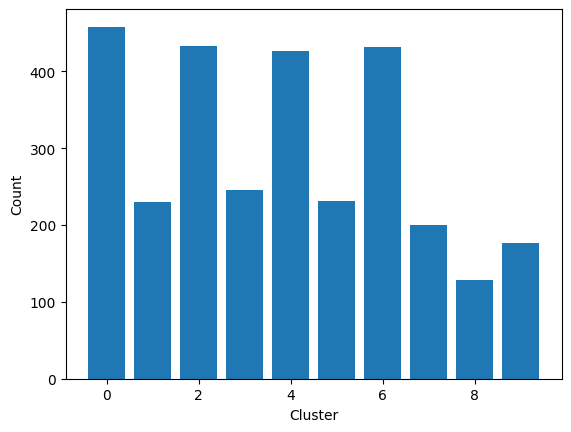

In [13]:
# Bagged clustering
winterActiv = pd.read_csv(r"C:\Users\Manoj\Desktop\FynnL\Team\WinterActive.csv")
from sklearn.cluster import AgglomerativeClustering

# Set the random seed
np.random.seed(1234)

# Perform bottom-up hierarchical clustering
base_k = 10
base_iter = 50

clustering = AgglomerativeClustering(n_clusters=base_k, linkage='ward')
cluster_labels = clustering.fit_predict(winterActiv)

print("Cluster Labels:")
print(cluster_labels)

cluster_labels = clustering.fit_predict(winterActiv)

# Count the number of samples in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

# Create the bar chart
plt.bar(cluster_counts.index, cluster_counts.values)

# Set the x-axis label
plt.xlabel('Cluster')

# Set the y-axis label
plt.ylabel('Count')

# Display the plot
plt.show()




BIC Scores: [3806.9724738798095, 3816.819109398048, 3849.223014547181, 3876.435483619539, 3913.246154860319, 3944.3356432678383, 3979.235418335405]
Best G: 2


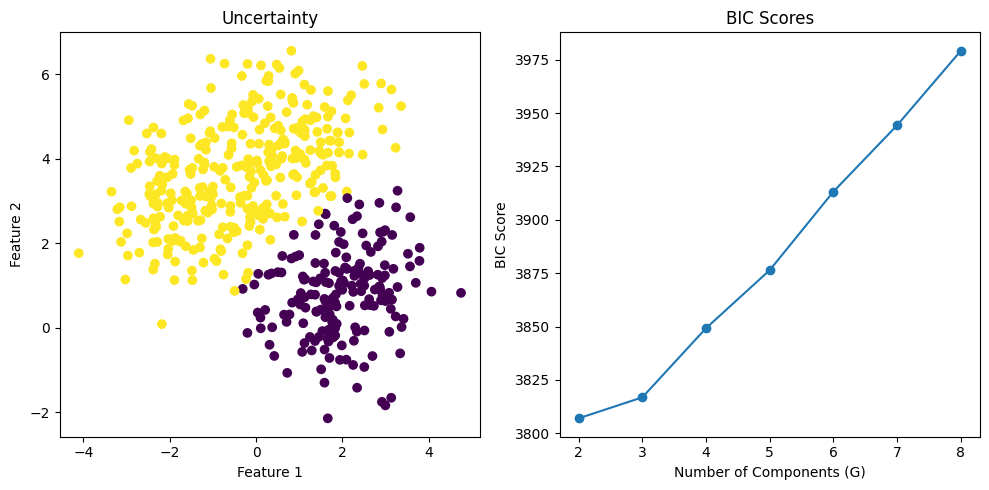

In [14]:
# Normal distributions
from sklearn.mixture import GaussianMixture


# Generate the PF3 dataset
from sklearn.datasets import make_blobs

# Set the random seed
np.random.seed(1234)

# Generate the PF3-like dataset
n_samples = 500
n_features = 2
n_clusters = 3

PF3, _ = make_blobs(
    n_samples=n_samples,
    n_features=n_features,
    centers=n_clusters,
    random_state=0,
)

# Perform model-based clustering
G_range = range(2, 9)
bic_scores = []
for G in G_range:
    gmm = GaussianMixture(n_components=G, random_state=0)
    gmm.fit(PF3)
    bic = gmm.bic(PF3)
    bic_scores.append(bic)

best_G = G_range[np.argmin(bic_scores)]

print("BIC Scores:", bic_scores)
print("Best G:", best_G)

# Fit the Gaussian Mixture Model with the best G
best_gmm = GaussianMixture(n_components=best_G, random_state=0)
best_gmm.fit(PF3)

# Visualize uncertainty and BIC
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(PF3[:, 0], PF3[:, 1], c=best_gmm.predict(PF3))
plt.title("Uncertainty")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.plot(G_range, bic_scores, marker='o')
plt.title("BIC Scores")
plt.xlabel("Number of Components (G)")
plt.ylabel("BIC Score")

plt.tight_layout()
plt.show()


In [19]:
# Extracting segments
import numpy as np
from sklearn.utils import resample
from sklearn.cluster import KMeans

# Load the "risk" dataset
risk = np.array([[0.18, 0.89], [0.33, 0.78], [0.41, 0.81], [0.40, 0.55], [0.10, 0.33], [0.30, 0.75], [0.17, 0.89], [0.41, 0.62], [0.35, 0.81], [0.19, 0.43]])

# Set the seed for reproducibility
np.random.seed(1234)

# Perform bootstrapping and clustering
k_values = range(2, 10)
n_rep = 10
bootstrap_results = []

for k in k_values:
    cluster_results = []
    for _ in range(n_rep):
        # Perform bootstrapping
        boot_data = resample(risk, replace=True, random_state=np.random.randint(0, 1000))
        
        # Perform clustering
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(boot_data)
        
        cluster_results.append(kmeans.labels_)
    
    bootstrap_results.append(cluster_results)



C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

C:\Users\Manoj\AppData\Local\Temp\ipykernel_10272\2708711027.py:24: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(boot_data)
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Temp\ipykernel_10272\2708711027.py:24: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(boot_data)
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

C:\Users\Manoj\AppData\Local\Temp\ipykernel_10272\2708711027.py:24: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(boot_data)
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Temp\ipykernel_10272\2708711027.py:24: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(boot_data)
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

In [20]:
# Segment Level Stability
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(1234)

# Generate the price features
PF3 = np.random.choice([1, 2, 3], size=(500,), p=[0.4, 0.4, 0.2])

# Apply stepwise clustering
k_values = range(3, 9)
n_rep = 10
stepwise_results = {}

for k in k_values:
    k_clusters = []
    for _ in range(n_rep):
        # Perform clustering
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(PF3.reshape(-1, 1))
        
        k_clusters.append(kmeans.labels_)
    
    stepwise_results[k] = k_clusters

# Relabel the clusters
stepwise_results_relabel = {}
for k, clusters in stepwise_results.items():
    relabeled_clusters = []
    for cluster in clusters:
        _, idx = np.unique(cluster, return_inverse=True)
        relabeled_clusters.append(idx)
    
    stepwise_results_relabel[k] = relabeled_clusters

# Perform silhouette-based cluster selection
silhouette_scores = {}
for k, clusters in stepwise_results_relabel.items():
    silhouette_scores[k] = [silhouette_score(PF3.reshape(-1, 1), cluster) for cluster in clusters]

# Select the best clustering results
best_k = max(silhouette_scores, key=lambda k: np.mean(silhouette_scores[k]))
best_clusters = stepwise_results_relabel[best_k]

# Apply slswFlexclust
PF3_r3 = np.array([np.mean(PF3[cluster] == i) for cluster in best_clusters[:3]])
PF3_r6 = np.array([np.mean(PF3[cluster] == i) for cluster in best_clusters[:6]])


C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

C:\Users\Manoj\AppData\Local\Temp\ipykernel_10272\2444870360.py:21: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(PF3.reshape(-1, 1))
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Temp\ipykernel_10272\2444870360.py:21: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(PF3.reshape(-1, 1))
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init

C:\Users\Manoj\AppData\Local\Temp\ipykernel_10272\2444870360.py:21: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(PF3.reshape(-1, 1))
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Temp\ipykernel_10272\2444870360.py:21: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(PF3.reshape(-1, 1))
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init

C:\Users\Manoj\AppData\Local\Temp\ipykernel_10272\2444870360.py:21: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(PF3.reshape(-1, 1))
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Temp\ipykernel_10272\2444870360.py:21: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(PF3.reshape(-1, 1))
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init

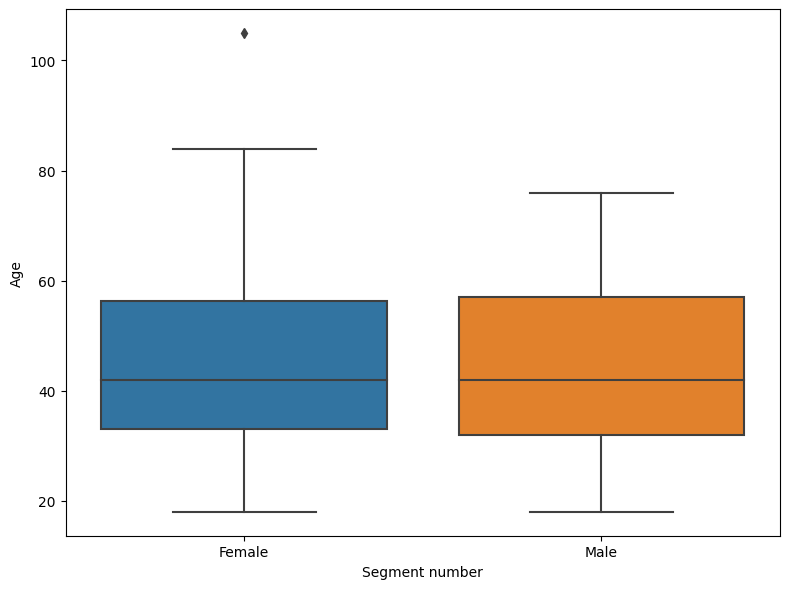

In [34]:
# Metric Descriptor Variables

# Boxplot of Age by Segment (Gender)
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=vac['Gender'], y=vac['Age'], ax=ax)
ax.set_xlabel('Segment number')
ax.set_ylabel('Age')
plt.tight_layout()

plt.show()
